In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import torch
import gpytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import wandb
import random


def data_import(path, delimiter):
    # Read the data, treating empty strings as NaN
    if delimiter == 'none':
        data = pd.read_csv(path, na_values=["", " ", "nan", "NaN", "NA"])
    else:
        data = pd.read_csv(path, delimiter=delimiter, na_values=["", " ", "nan", "NaN", "NA"])
    
    # Drop rows with any NaN values
    data.dropna(axis=0, how='any', inplace=True)
    return data



def data_frequency(file1, desired_frequency: str):
    # Ensure 'Time(UTC)' is in datetime format
    file1['Time(UTC)'] = pd.to_datetime(file1['Time(UTC)'])

    # Set 'Time(UTC)' as the index
    file1.set_index('Time(UTC)', inplace=True)

    if desired_frequency == 'ten_minute':
        file1 = file1.resample('10T').mean()
    elif desired_frequency == '4_hourly':
        file1 = file1.resample('4H').mean()
    elif desired_frequency == 'hourly':
        file1 = file1.resample('H').mean()
    elif desired_frequency == 'twelve_hourly':
        file1 = file1.resample('12H').mean()
    elif desired_frequency == 'daily':
        file1 = file1.resample('D').mean()

    # Drop any rows with NaN values after resampling
    # Drop rows with any NaN values
    file1.dropna(axis=0, how='any', inplace=True)    
    # Reset the index and name it 'Time(UTC)'
    file1.reset_index(inplace=True)
    file1.rename(columns={file1.index.name: 'Time(UTC)'}, inplace=True)

    return file1

def time_to_sincos(df):
    sin_values = []
    cos_values = []

    for i in range(len(df)):
        sin_values.append(np.sin((2 * np.pi * i) / 365.25))
        cos_values.append(np.cos((2 * np.pi * i) / 365.25))
        
    df['Time_sin'] = sin_values
    df['Time_cos'] = cos_values
    
    return df


#importing s2 and m1 data sets
s2_site_data= data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILS2_cleaned.csv", 'none')
m1_site_data = data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILM1_cleaned.csv", 'none')

#change to 12 hour frequency 
s2_site_data = data_frequency(s2_site_data, '4_hourly')
m1_site_data = data_frequency(m1_site_data, '4_hourly') 

#extract time(UTC) collumns for usage later
time_s2 = s2_site_data['Time(UTC)']
time_m1 = m1_site_data['Time(UTC)']

#remove pressure data from sets
s2_site_data.drop(columns=['sample_pres_mmHg'], inplace=True)
m1_site_data.drop(columns=['sample_pres_mmHg'], inplace=True)


#add sin and cos time values to data
s2_site_data = time_to_sincos(s2_site_data)
m1_site_data = time_to_sincos(m1_site_data)


#change entire dataset to tensor
collumns = ['Time_sin', 'Time_cos', 'sample_rh_pct', 'sample_temp_C', 'pm_1_ug_per_m3']
s2_site_data = torch.tensor(s2_site_data[collumns].values, dtype=torch.float32)
m1_site_data = torch.tensor(m1_site_data[collumns].values, dtype=torch.float32)


In [ ]:
def count_points_in_month(time_series, month, year):
    # Convert the time series to datetime format
    time_series = pd.to_datetime(time_series)
    
    # Filter the series for the given month and year
    mask = (time_series.dt.month == month) & (time_series.dt.year == year)
    filtered_series = time_series[mask]
    
    # Count the number of data points in the filtered series
    count = filtered_series.shape[0]
    
    return count

# Example usage
# Count the number of data points for each month in s2 data
points_in_june_2022 = count_points_in_month(time_s2, 6, 2022)
print(f'Number of data points in June 2022: {points_in_june_2022}')

points_in_july_2022 = count_points_in_month(time_s2, 7, 2022)
print(f'Number of data points in July 2022: {points_in_july_2022}')

points_in_august_2022 = count_points_in_month(time_s2, 8, 2022)
print(f'Number of data points in August 2022: {points_in_august_2022}')

points_in_september_2022 = count_points_in_month(time_s2, 9, 2022)
print(f'Number of data points in September 2022: {points_in_september_2022}')

points_in_october_2022 = count_points_in_month(time_s2, 10, 2022)
print(f'Number of data points in October 2022: {points_in_october_2022}')

points_in_november_2022 = count_points_in_month(time_s2, 11, 2022)
print(f'Number of data points in November 2022: {points_in_november_2022}')

# Count the number of data points in December 2022
points_in_december_2022 = count_points_in_month(time_s2, 12, 2022)
print(f'Number of data points in December 2022: {points_in_december_2022}')

# Count the number of data points in January 2023
points_in_january_2023 = count_points_in_month(time_s2, 1, 2023)
print(f'Number of data points in January 2023: {points_in_january_2023}')

# Count the number of data points in February 2023
points_in_february_2023 = count_points_in_month(time_s2, 2, 2023)
print(f'Number of data points in February 2023: {points_in_february_2023}')

# Count the number of data points in March 2023
points_in_march_2023 = count_points_in_month(time_s2, 3, 2023)
print(f'Number of data points in March 2023: {points_in_march_2023}')

# Count the number of data points in April 2023
points_in_april_2023 = count_points_in_month(time_s2, 4, 2023)
print(f'Number of data points in April 2023: {points_in_april_2023}')

# Count the number of data points in May 2023
points_in_may_2023 = count_points_in_month(time_s2, 5, 2023)
print(f'Number of data points in May 2023: {points_in_may_2023}')

# Count the number of data points in June 2023
points_in_june_2023 = count_points_in_month(time_s2, 6, 2023)
print(f'Number of data points in June 2023: {points_in_june_2023}')


# Count the number of data points for each month in m1 data
points_in_june_2022_m1 = count_points_in_month(time_m1, 6, 2022)
print(f'Number of data points in June 2022 (m1): {points_in_june_2022_m1}')

points_in_july_2022_m1 = count_points_in_month(time_m1, 7, 2022)
print(f'Number of data points in July 2022 (m1): {points_in_july_2022_m1}')

points_in_august_2022_m1 = count_points_in_month(time_m1, 8, 2022)
print(f'Number of data points in August 2022 (m1): {points_in_august_2022_m1}')

points_in_september_2022_m1 = count_points_in_month(time_m1, 9, 2022)
print(f'Number of data points in September 2022 (m1): {points_in_september_2022_m1}')

points_in_october_2022_m1 = count_points_in_month(time_m1, 10, 2022)
print(f'Number of data points in October 2022 (m1): {points_in_october_2022_m1}')

points_in_november_2022_m1 = count_points_in_month(time_m1, 11, 2022)
print(f'Number of data points in November 2022 (m1): {points_in_november_2022_m1}')

points_in_december_2022_m1 = count_points_in_month(time_m1, 12, 2022)
print(f'Number of data points in December 2022 (m1): {points_in_december_2022_m1}')

points_in_january_2023_m1 = count_points_in_month(time_m1, 1, 2023)
print(f'Number of data points in January 2023 (m1): {points_in_january_2023_m1}')

points_in_february_2023_m1 = count_points_in_month(time_m1, 2, 2023)
print(f'Number of data points in February 2023 (m1): {points_in_february_2023_m1}')

points_in_march_2023_m1 = count_points_in_month(time_m1, 3, 2023)
print(f'Number of data points in March 2023 (m1): {points_in_march_2023_m1}')

points_in_april_2023_m1 = count_points_in_month(time_m1, 4, 2023)
print(f'Number of data points in April 2023 (m1): {points_in_april_2023_m1}')

points_in_may_2023_m1 = count_points_in_month(time_m1, 5, 2023)
print(f'Number of data points in May 2023 (m1): {points_in_may_2023_m1}')

points_in_june_2023_m1 = count_points_in_month(time_m1, 6, 2023)
print(f'Number of data points in June 2023 (m1): {points_in_june_2023_m1}')

#split time_{m1, s2} months and define variables based on that
time_s2 = pd.to_datetime(time_s2)
time_m1 = pd.to_datetime(time_m1)

time_s2_june_2022 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2022)]
time_s2_july_2022 = time_s2[(time_s2.dt.month == 7) & (time_s2.dt.year == 2022)]
time_s2_august_2022 = time_s2[(time_s2.dt.month == 8) & (time_s2.dt.year == 2022)]
time_s2_september_2022 = time_s2[(time_s2.dt.month == 9) & (time_s2.dt.year == 2022)]
time_s2_october_2022 = time_s2[(time_s2.dt.month == 10) & (time_s2.dt.year == 2022)]
time_s2_november_2022 = time_s2[(time_s2.dt.month == 11) & (time_s2.dt.year == 2022)]
time_s2_december_2022 = time_s2[(time_s2.dt.month == 12) & (time_s2.dt.year == 2022)]
time_s2_january_2023 = time_s2[(time_s2.dt.month == 1) & (time_s2.dt.year == 2023)]
time_s2_february_2023 = time_s2[(time_s2.dt.month == 2) & (time_s2.dt.year == 2023)]
time_s2_march_2023 = time_s2[(time_s2.dt.month == 3) & (time_s2.dt.year == 2023)]
time_s2_april_2023 = time_s2[(time_s2.dt.month == 4) & (time_s2.dt.year == 2023)]
time_s2_may_2023 = time_s2[(time_s2.dt.month == 5) & (time_s2.dt.year == 2023)]
time_s2_june_2023 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2023)]

time_m1_june_2022 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2022)]
time_m1_july_2022 = time_m1[(time_m1.dt.month == 7) & (time_m1.dt.year == 2022)]
time_m1_august_2022 = time_m1[(time_m1.dt.month == 8) & (time_m1.dt.year == 2022)]
time_m1_september_2022 = time_m1[(time_m1.dt.month == 9) & (time_m1.dt.year == 2022)]
time_m1_october_2022 = time_m1[(time_m1.dt.month == 10) & (time_m1.dt.year == 2022)]
time_m1_november_2022 = time_m1[(time_m1.dt.month == 11) & (time_m1.dt.year == 2022)]
time_m1_december_2022 = time_m1[(time_m1.dt.month == 12) & (time_m1.dt.year == 2022)]
time_m1_january_2023 = time_m1[(time_m1.dt.month == 1) & (time_m1.dt.year == 2023)]
time_m1_february_2023 = time_m1[(time_m1.dt.month == 2) & (time_m1.dt.year == 2023)]
time_m1_march_2023 = time_m1[(time_m1.dt.month == 3) & (time_m1.dt.year == 2023)]
time_m1_april_2023 = time_m1[(time_m1.dt.month == 4) & (time_m1.dt.year == 2023)]
time_m1_may_2023 = time_m1[(time_m1.dt.month == 5) & (time_m1.dt.year == 2023)]
time_m1_june_2023 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2023)]


In [ ]:
def create_monthly_subsets(data_tensor, num_points_dict, prefix):
    start_idx = 0
    subsets = {}

    for year_month, num_points in num_points_dict.items():
        # Calculate the end index
        end_idx = start_idx + num_points
        
        # Create a name for the subset
        subset_name = f"{prefix}_{year_month.replace('-', '_')}"
        
        # Slice the data tensor to get the subset
        subsets[subset_name] = data_tensor[start_idx:end_idx]
        
        # Update the start index
        start_idx = end_idx
    
    return subsets

# Provided values for the number of data points per month
num_points_s2 = {
    "2022-06": points_in_june_2022,
    "2022-07": points_in_july_2022,
    "2022-08": points_in_august_2022,
    "2022-09": points_in_september_2022,
    "2022-10": points_in_october_2022,
    "2022-11": points_in_november_2022,
    "2022-12": points_in_december_2022,
    "2023-01": points_in_january_2023,
    "2023-02": points_in_february_2023,
    "2023-03": points_in_march_2023,
    "2023-04": points_in_april_2023,
    "2023-05": points_in_may_2023,
    "2023-06": points_in_june_2023
}

num_points_m1 = {
    "2022-06": points_in_june_2022_m1,
    "2022-07": points_in_july_2022_m1,
    "2022-08": points_in_august_2022_m1,
    "2022-09": points_in_september_2022_m1,
    "2022-10": points_in_october_2022_m1,
    "2022-11": points_in_november_2022_m1,
    "2022-12": points_in_december_2022_m1,
    "2023-01": points_in_january_2023_m1,
    "2023-02": points_in_february_2023_m1,
    "2023-03": points_in_march_2023_m1,
    "2023-04": points_in_april_2023_m1,
    "2023-05": points_in_may_2023_m1,
    "2023-06": points_in_june_2023_m1
}
    
""" num_points_s2 = {
    "2022-06": 14328,
    "2022-07": 42180,
    "2022-08": 44630,
    "2022-09": 43200,
    "2022-10": 31768,
    "2022-11": 30998,
    "2022-12": 40247,
    "2023-01": 26928,
    "2023-02": 34744,
    "2023-03": 41444,
    "2023-04": 42244,
    "2023-05": 44633,
    "2023-06": 24254
}

num_points_m1 = {
    "2022-06": 4247,
    "2022-07": 42579,
    "2022-08": 44637,
    "2022-09": 43198,
    "2022-10": 43510,
    "2022-11": 34796,
    "2022-12": 37315,
    "2023-01": 38396,
    "2023-02": 16462,
    "2023-03": 24437,
    "2023-04": 15325,
    "2023-05": 9290,
    "2023-06": 1092
} """

# Assuming s2_site_data and m1_site_data are already loaded as tensors
monthly_data_s2 = create_monthly_subsets(s2_site_data, num_points_s2, "s2")
monthly_data_m1 = create_monthly_subsets(m1_site_data, num_points_m1, "m1")


#intialize monthly values for s2 and m1 datasets
s2_june22 = monthly_data_s2['s2_2022_06']
s2_july22 = monthly_data_s2['s2_2022_07']
s2_aug22 = monthly_data_s2['s2_2022_08']
s2_sept22 = monthly_data_s2['s2_2022_09']
s2_oct22 = monthly_data_s2['s2_2022_10']
s2_nov22 = monthly_data_s2['s2_2022_11']
s2_dec22 = monthly_data_s2['s2_2022_12']
s2_jan23 = monthly_data_s2['s2_2023_01']
s2_feb23 = monthly_data_s2['s2_2023_02']
s2_mar23 = monthly_data_s2['s2_2023_03']
s2_apr23 = monthly_data_s2['s2_2023_04']
s2_may23 = monthly_data_s2['s2_2023_05']
s2_june23 = monthly_data_s2['s2_2023_06']

m1_june22 = monthly_data_m1['m1_2022_06']
m1_july22 = monthly_data_m1['m1_2022_07']
m1_aug22 = monthly_data_m1['m1_2022_08']
m1_sept22 = monthly_data_m1['m1_2022_09']
m1_oct22 = monthly_data_m1['m1_2022_10']
m1_nov22 = monthly_data_m1['m1_2022_11']
m1_dec22 = monthly_data_m1['m1_2022_12']
m1_jan23 = monthly_data_m1['m1_2023_01']
m1_feb23 = monthly_data_m1['m1_2023_02']
m1_mar23 = monthly_data_m1['m1_2023_03']
m1_apr23 = monthly_data_m1['m1_2023_04']
m1_may23 = monthly_data_m1['m1_2023_05']
m1_june23 = monthly_data_m1['m1_2023_06']


""" #for loop to print shapes of each month
for month in monthly_data_s2:
    print(f"{month}: {monthly_data_s2[month].shape}")

for month in monthly_data_m1:
    print(f"{month}: {monthly_data_m1[month].shape}")
 """

def extract_time_series_by_month(time_series, num_points_dict, prefix):
    start_idx = 0
    time_series_dict = {}

    for year_month, num_points in num_points_dict.items():
        end_idx = start_idx + num_points
        subset_name = f"{prefix}_time_series_{year_month.replace('-', '_')}"
        time_series_dict[subset_name] = time_series[start_idx:end_idx]
        start_idx = end_idx
    
    return time_series_dict

# Extract time series for each month for s2 data
time_series_s2_dict = extract_time_series_by_month(time_s2, num_points_s2, 's2')

# Extract time series for each month for m1 data
time_series_m1_dict = extract_time_series_by_month(time_m1, num_points_m1, 'm1')

 # Print the shapes to verify
for month, series in time_series_s2_dict.items():
    print(f"{month}: {series.shape}")

""" for month, series in time_series_m1_dict.items():
    print(f"{month}: {series.shape}")  """


# Print the keys and shapes to verify


In [ ]:
def evenly_disperse_split(data_tensor, n, reverse=0):
    training_size = int(n * data_tensor.shape[0])
    total_points = data_tensor.shape[0]
    indices = np.arange(total_points)
    # Calculate step size to achieve the desired training size
    step_size = max(1, total_points // training_size)
    # Select training indices evenly distributed throughout the dataset
    train_indices = indices[::step_size][:training_size]
    test_indices = np.setdiff1d(indices, train_indices)
 
    if reverse == 0:
        train_indices, test_indices = test_indices, train_indices
    
    # Split the data into training and testing sets using the indices
    train_x = data_tensor[train_indices, :-1]
    test_x = data_tensor[test_indices, :-1]
    train_y = data_tensor[train_indices, -1]
    test_y = data_tensor[test_indices, -1]



    """     print(f'step size is ', {step_size})

    print(f'train indices is ', (train_indices))

    print(f'test indices is ', (test_indices)) """
    
    return train_x, test_x, train_y, test_y

""" evenly_disperse_split(s2_apr23, 0.0, 0)
 """

In [92]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        """    self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.PeriodicKernel(
                period_length_prior=gpytorch.priors.NormalPrior(24, 1.0)
            ) * gpytorch.kernels.MaternKernel(
                nu=1.5, lengthscale_prior=gpytorch.priors.NormalPrior(1.0, 0.1)
            )
        ) """
        self.covar_module = gpytorch.kernels.RBFKernel()
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

def optimize(train_x, train_y):

    # Initialize the likelihood with an appropriate noise constraint
    noise_constraint = gpytorch.constraints.GreaterThan(1e-6)
    likelihood = gpytorch.likelihoods.GaussianLikelihood(noise_constraint=noise_constraint)

    model = ExactGPModel(train_x, train_y, likelihood)
    training_iter = 300
    model.train()
    likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)


    for i in range(training_iter):
        optimizer.zero_grad()
        output = model(train_x)  # This line causes the error
        loss = -mll(output, train_y).mean()
        loss.backward()
        optimizer.step()

        # Clear caches by toggling training mode
        model.train()
        if i % 10 == 0:
            print(f'Iter {i+1:d}/{training_iter:d} - Loss: {loss.item():.3f} ')
    return model, likelihood

def eval_gaussian(model, likelihood, test_x, test_y):
    model.eval()
    likelihood.eval()
    observed_pred = likelihood(model(test_x))
    mean = observed_pred.mean
    lower, upper = observed_pred.confidence_region()
    variance = observed_pred.variance
    mse = torch.mean(torch.pow(mean - test_y, 2))
    nll = -observed_pred.log_prob(test_y).mean()
    mape = torch.mean(torch.abs((test_y - mean) / test_y)) * 100


    return mse, observed_pred, nll, mape, mean, lower, upper, variance

def plot_gp_with_dates(time_series, true_y, predicted_y, lower, upper, title, mse, nll, mape):
    # Print the metrics
    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Negative Log Likelihood: {nll:.3f}')
    print(f'Mean Absolute Percentage Error: {mape:.3f}%')

    # Convert time_series to datetime if not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(time_series):
        time_series = pd.to_datetime(time_series)

    # Ensure all inputs are numpy arrays
    if torch.is_tensor(true_y):
        true_y = true_y.detach().numpy()
    if torch.is_tensor(predicted_y):
        predicted_y = predicted_y.detach().numpy()
    if torch.is_tensor(lower):
        lower = lower.detach().numpy()
    if torch.is_tensor(upper):
        upper = upper.detach().numpy()

    # Plot the data
    plt.figure(figsize=(14, 10))

    plt.plot(time_series, true_y, 'k*', label='True Values')
    plt.plot(time_series, predicted_y, '*', label='Predicted Values')

    # Add vertical bars for confidence intervals
    plt.vlines(time_series, lower, upper, color='blue', alpha=0.5, label='95% Confidence Interval')

    # Add vertical bars for errors
    plt.vlines(time_series, true_y, predicted_y, color='r', linestyle='dashed', alpha=0.7, label='Prediction Error')

    plt.xlabel('Date')
    plt.ylabel('PM 1 ug/m3')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()

   

In [93]:
def run_plt_gp(dataset, time_series,title,  reverse):    
    train_x, test_x, train_y, test_y = evenly_disperse_split(dataset, 0.5, reverse=reverse)
    
    """   print(f'Training set size: {train_x.shape}')
    print(f'Test set size: {test_x.shape}')
    print(f'Training target size: {train_y.shape}')
    print(f'Test target size: {test_y.shape}') """
    
    # Optimization step
    model, likelihood = optimize(train_x, train_y)

    # Ensure model is in eval mode
    model.eval()
    likelihood.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        observed_pred = likelihood(model(test_x))

    # Evaluate the model
    mse, observed_pred, nll, mape, mean, lower, upper, variance = eval_gaussian(model, likelihood, test_x, test_y)

    # Extract true values from the test set
    true_y = test_y.detach().numpy()

    # Extract the corresponding dates from the original time series
    time_series = pd.to_datetime(time_series[-len(dataset):][-len(test_x):])
    
    # Extract the corresponding dates for the training data
    train_time_series = pd.to_datetime(time_series[-len(dataset):][:len(train_x)])

    # Convert tensors to numpy arrays for plotting
    mean_np = mean.detach().numpy()
    lower_np = lower.detach().numpy()
    upper_np = upper.detach().numpy()


    plot_gp_with_dates(time_series, true_y, mean_np, lower_np, upper_np, title, mse, nll, mape)


GP on s2 time series 2022 06 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 1.061 
Iter 11/300 - Loss: 0.906 
Iter 21/300 - Loss: 0.778 
Iter 31/300 - Loss: 0.700 
Iter 41/300 - Loss: 0.678 
Iter 51/300 - Loss: 0.677 
Iter 61/300 - Loss: 0.669 
Iter 71/300 - Loss: 0.663 
Iter 81/300 - Loss: 0.659 
Iter 91/300 - Loss: 0.654 
Iter 101/300 - Loss: 0.651 
Iter 111/300 - Loss: 0.648 
Iter 121/300 - Loss: 0.645 
Iter 131/300 - Loss: 0.643 
Iter 141/300 - Loss: 0.641 
Iter 151/300 - Loss: 0.639 
Iter 161/300 - Loss: 0.638 
Iter 171/300 - Loss: 0.637 
Iter 181/300 - Loss: 0.636 
Iter 191/300 - Loss: 0.635 
Iter 201/300 - Loss: 0.634 
Iter 211/300 - Loss: 0.634 
Iter 221/300 - Loss: 0.633 
Iter 231/300 - Loss: 0.632 
Iter 241/300 - Loss: 0.632 
Iter 251/300 - Loss: 0.631 
Iter 261/300 - Loss: 0.631 
Iter 271/300 - Loss: 0.631 
Iter 281/300 - Loss: 0.630 
Iter 291/300 - Loss: 0.630 
Mean Squared Error: 0.164
Negative Log Likelihood: 15.849
Mean Absolute Percentage Error: 

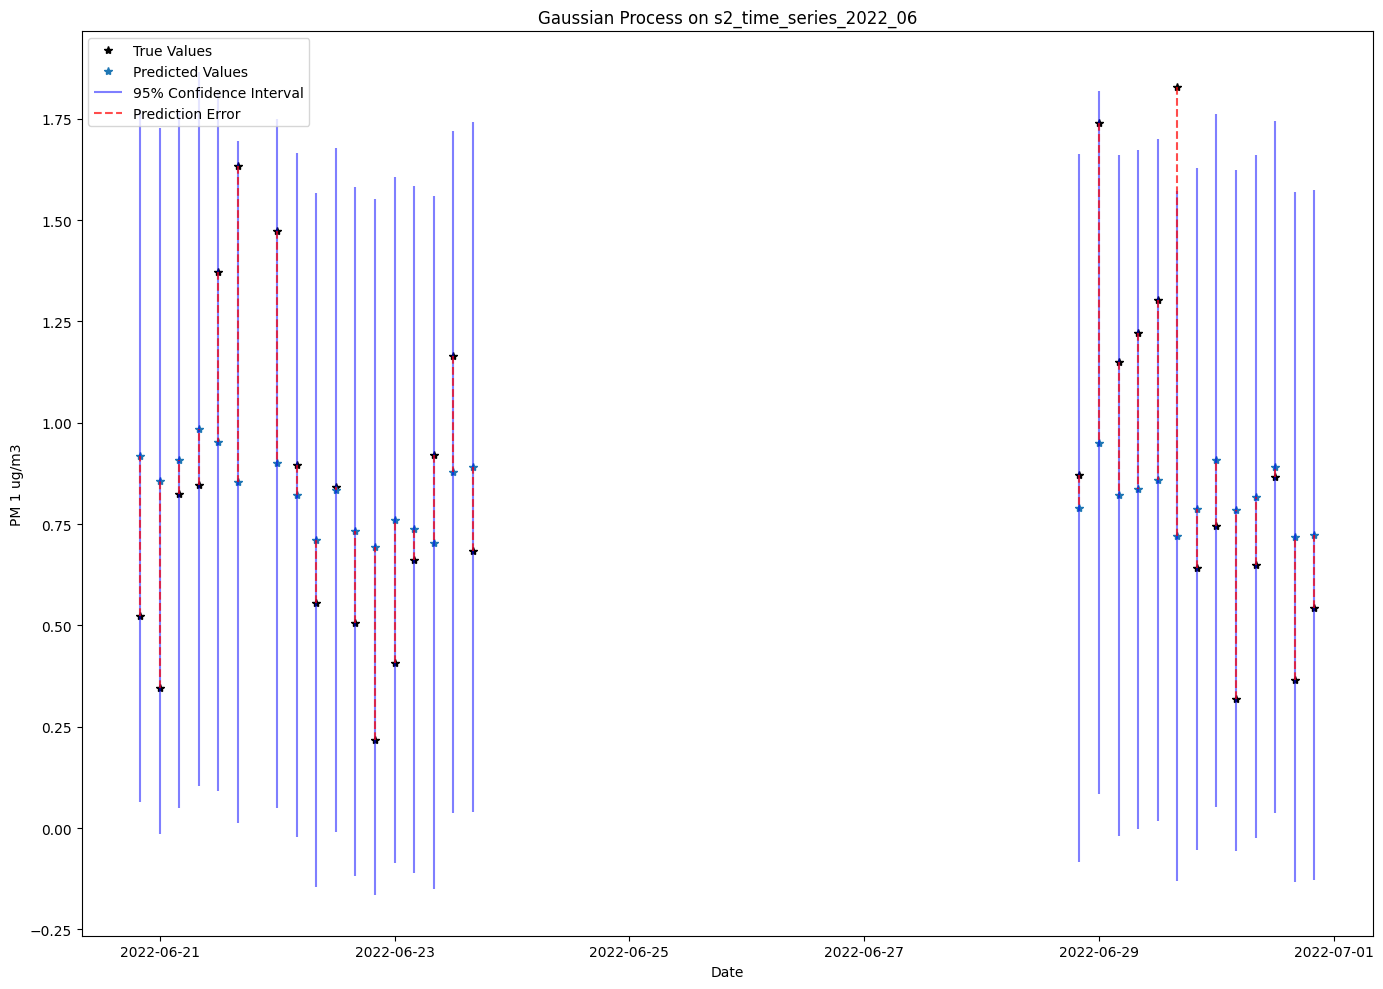

Iter 1/300 - Loss: 1.052 
Iter 11/300 - Loss: 0.896 
Iter 21/300 - Loss: 0.768 
Iter 31/300 - Loss: 0.688 
Iter 41/300 - Loss: 0.666 
Iter 51/300 - Loss: 0.666 
Iter 61/300 - Loss: 0.661 
Iter 71/300 - Loss: 0.657 
Iter 81/300 - Loss: 0.655 
Iter 91/300 - Loss: 0.652 
Iter 101/300 - Loss: 0.650 
Iter 111/300 - Loss: 0.648 
Iter 121/300 - Loss: 0.647 
Iter 131/300 - Loss: 0.646 
Iter 141/300 - Loss: 0.645 
Iter 151/300 - Loss: 0.644 
Iter 161/300 - Loss: 0.643 
Iter 171/300 - Loss: 0.642 
Iter 181/300 - Loss: 0.642 
Iter 191/300 - Loss: 0.641 
Iter 201/300 - Loss: 0.641 
Iter 211/300 - Loss: 0.641 
Iter 221/300 - Loss: 0.641 
Iter 231/300 - Loss: 0.640 
Iter 241/300 - Loss: 0.640 
Iter 251/300 - Loss: 0.640 
Iter 261/300 - Loss: 0.640 
Iter 271/300 - Loss: 0.640 
Iter 281/300 - Loss: 0.640 
Iter 291/300 - Loss: 0.640 
Mean Squared Error: 0.158
Negative Log Likelihood: 16.280
Mean Absolute Percentage Error: 56.892%


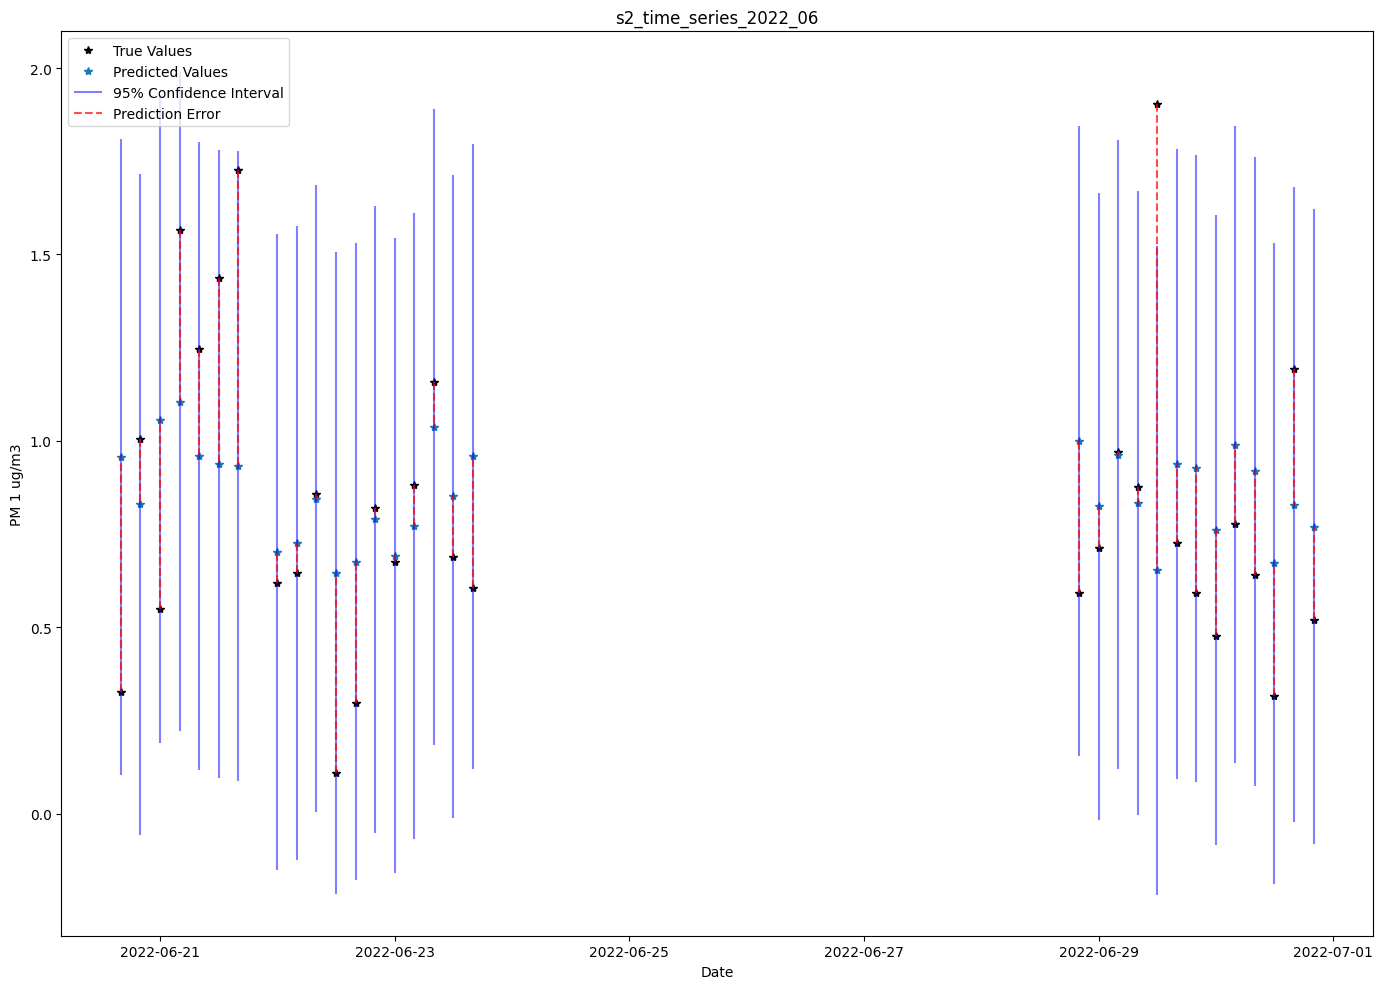

 
GP on s2 time series 2022 07 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 1.092 
Iter 11/300 - Loss: 1.014 
Iter 21/300 - Loss: 0.993 
Iter 31/300 - Loss: 0.992 
Iter 41/300 - Loss: 0.991 
Iter 51/300 - Loss: 0.990 
Iter 61/300 - Loss: 0.991 
Iter 71/300 - Loss: 0.990 
Iter 81/300 - Loss: 0.990 
Iter 91/300 - Loss: 0.990 
Iter 101/300 - Loss: 0.990 
Iter 111/300 - Loss: 0.990 
Iter 121/300 - Loss: 0.990 
Iter 131/300 - Loss: 0.990 
Iter 141/300 - Loss: 0.990 
Iter 151/300 - Loss: 0.990 
Iter 161/300 - Loss: 0.990 
Iter 171/300 - Loss: 0.990 
Iter 181/300 - Loss: 0.990 
Iter 191/300 - Loss: 0.990 
Iter 201/300 - Loss: 0.990 
Iter 211/300 - Loss: 0.990 
Iter 221/300 - Loss: 0.990 
Iter 231/300 - Loss: 0.990 
Iter 241/300 - Loss: 0.990 
Iter 251/300 - Loss: 0.990 
Iter 261/300 - Loss: 0.990 
Iter 271/300 - Loss: 0.990 
Iter 281/300 - Loss: 0.990 
Iter 291/300 - Loss: 0.990 
Mean Squared Error: 0.336
Negative Log Likelihood: 78.766
Mean Absolute Percentage Error

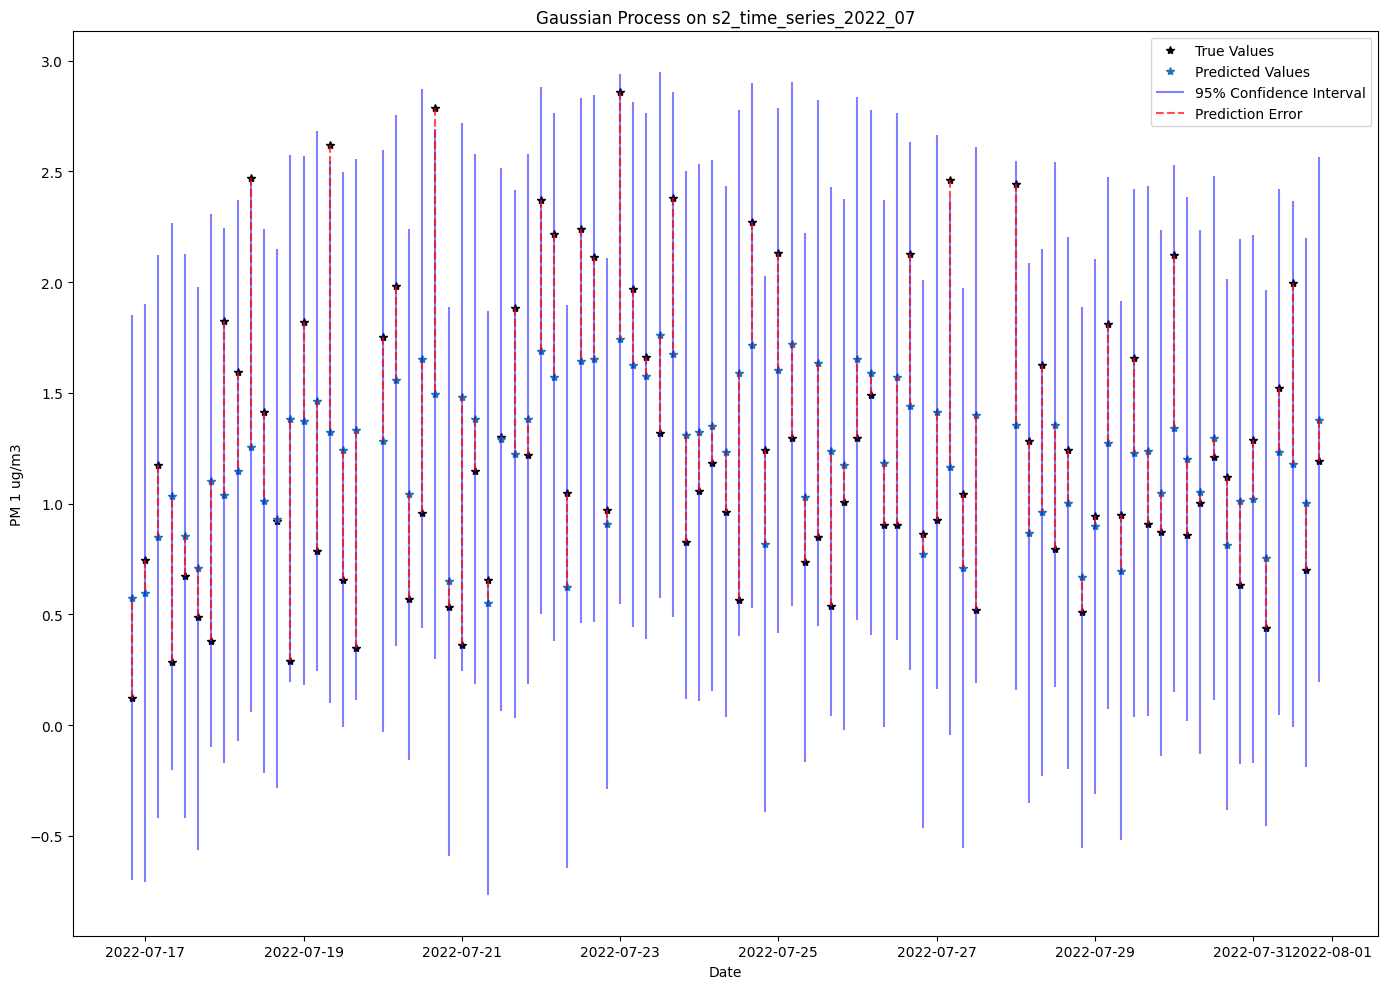

Iter 1/300 - Loss: 1.099 
Iter 11/300 - Loss: 1.020 
Iter 21/300 - Loss: 1.002 
Iter 31/300 - Loss: 1.004 
Iter 41/300 - Loss: 1.001 
Iter 51/300 - Loss: 1.001 
Iter 61/300 - Loss: 1.001 
Iter 71/300 - Loss: 1.001 
Iter 81/300 - Loss: 1.001 
Iter 91/300 - Loss: 1.001 
Iter 101/300 - Loss: 1.001 
Iter 111/300 - Loss: 1.001 
Iter 121/300 - Loss: 1.001 
Iter 131/300 - Loss: 1.001 
Iter 141/300 - Loss: 1.001 
Iter 151/300 - Loss: 1.001 
Iter 161/300 - Loss: 1.001 
Iter 171/300 - Loss: 1.001 
Iter 181/300 - Loss: 1.001 
Iter 191/300 - Loss: 1.001 
Iter 201/300 - Loss: 1.001 
Iter 211/300 - Loss: 1.001 
Iter 221/300 - Loss: 1.001 
Iter 231/300 - Loss: 1.001 
Iter 241/300 - Loss: 1.001 
Iter 251/300 - Loss: 1.001 
Iter 261/300 - Loss: 1.001 
Iter 271/300 - Loss: 1.001 
Iter 281/300 - Loss: 1.001 
Iter 291/300 - Loss: 1.001 
Mean Squared Error: 0.339
Negative Log Likelihood: 79.264
Mean Absolute Percentage Error: 56.048%


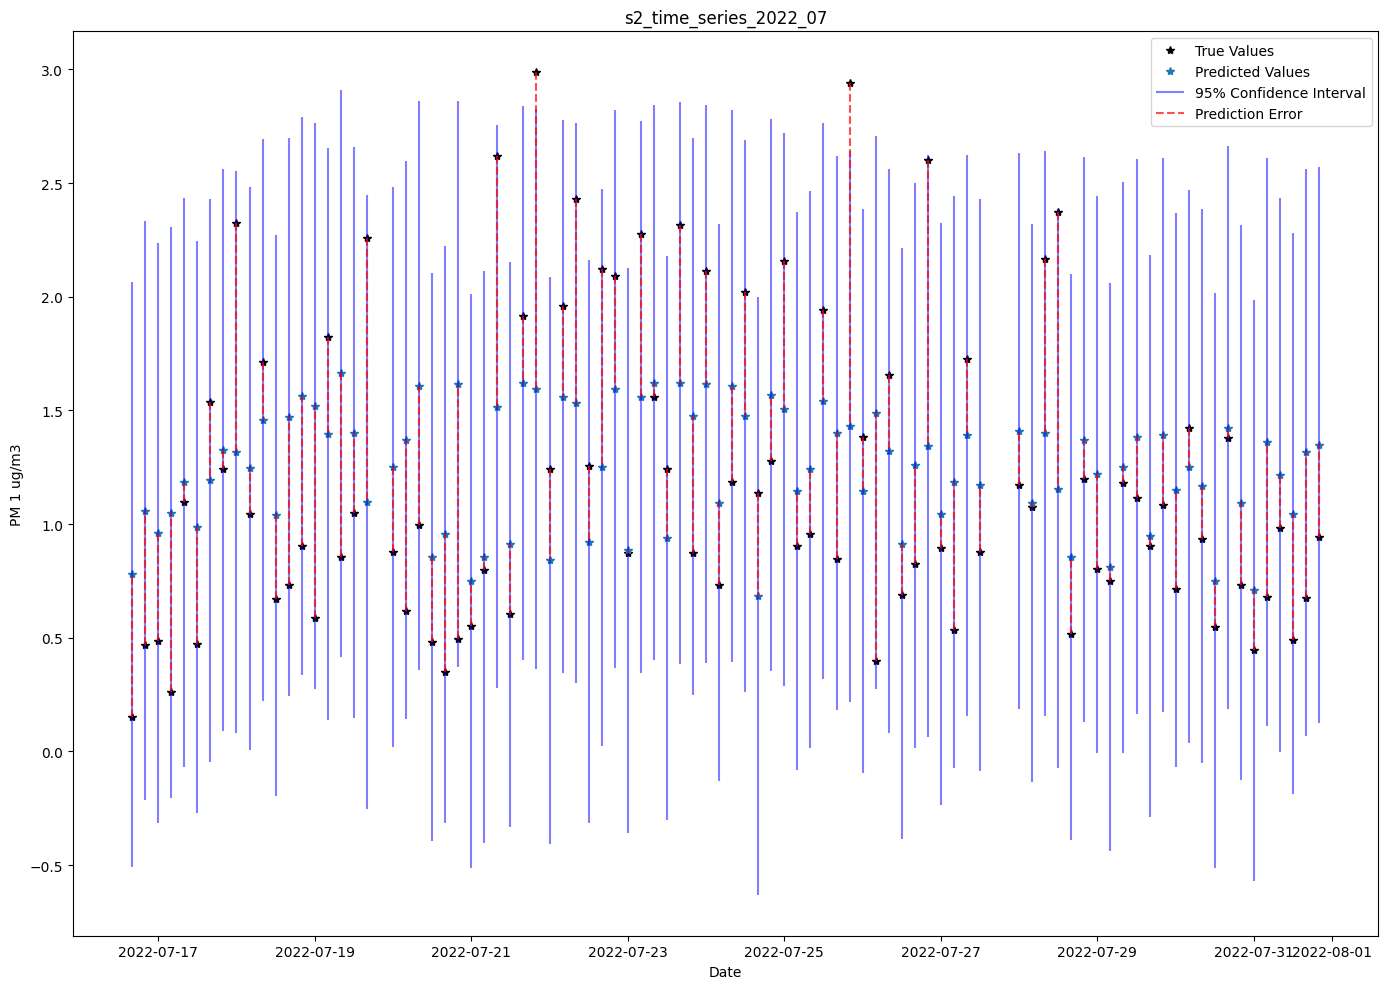

 
GP on s2 time series 2022 08 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 0.936 
Iter 11/300 - Loss: 0.770 
Iter 21/300 - Loss: 0.622 
Iter 31/300 - Loss: 0.513 
Iter 41/300 - Loss: 0.461 
Iter 51/300 - Loss: 0.456 
Iter 61/300 - Loss: 0.457 
Iter 71/300 - Loss: 0.455 
Iter 81/300 - Loss: 0.454 
Iter 91/300 - Loss: 0.454 
Iter 101/300 - Loss: 0.454 
Iter 111/300 - Loss: 0.454 
Iter 121/300 - Loss: 0.454 
Iter 131/300 - Loss: 0.454 
Iter 141/300 - Loss: 0.454 
Iter 151/300 - Loss: 0.454 
Iter 161/300 - Loss: 0.454 
Iter 171/300 - Loss: 0.454 
Iter 181/300 - Loss: 0.454 
Iter 191/300 - Loss: 0.454 
Iter 201/300 - Loss: 0.454 
Iter 211/300 - Loss: 0.454 
Iter 221/300 - Loss: 0.454 
Iter 231/300 - Loss: 0.454 
Iter 241/300 - Loss: 0.454 
Iter 251/300 - Loss: 0.454 
Iter 261/300 - Loss: 0.454 
Iter 271/300 - Loss: 0.454 
Iter 281/300 - Loss: 0.454 
Iter 291/300 - Loss: 0.454 
Mean Squared Error: 0.236
Negative Log Likelihood: 74.899
Mean Absolute Percentage Error

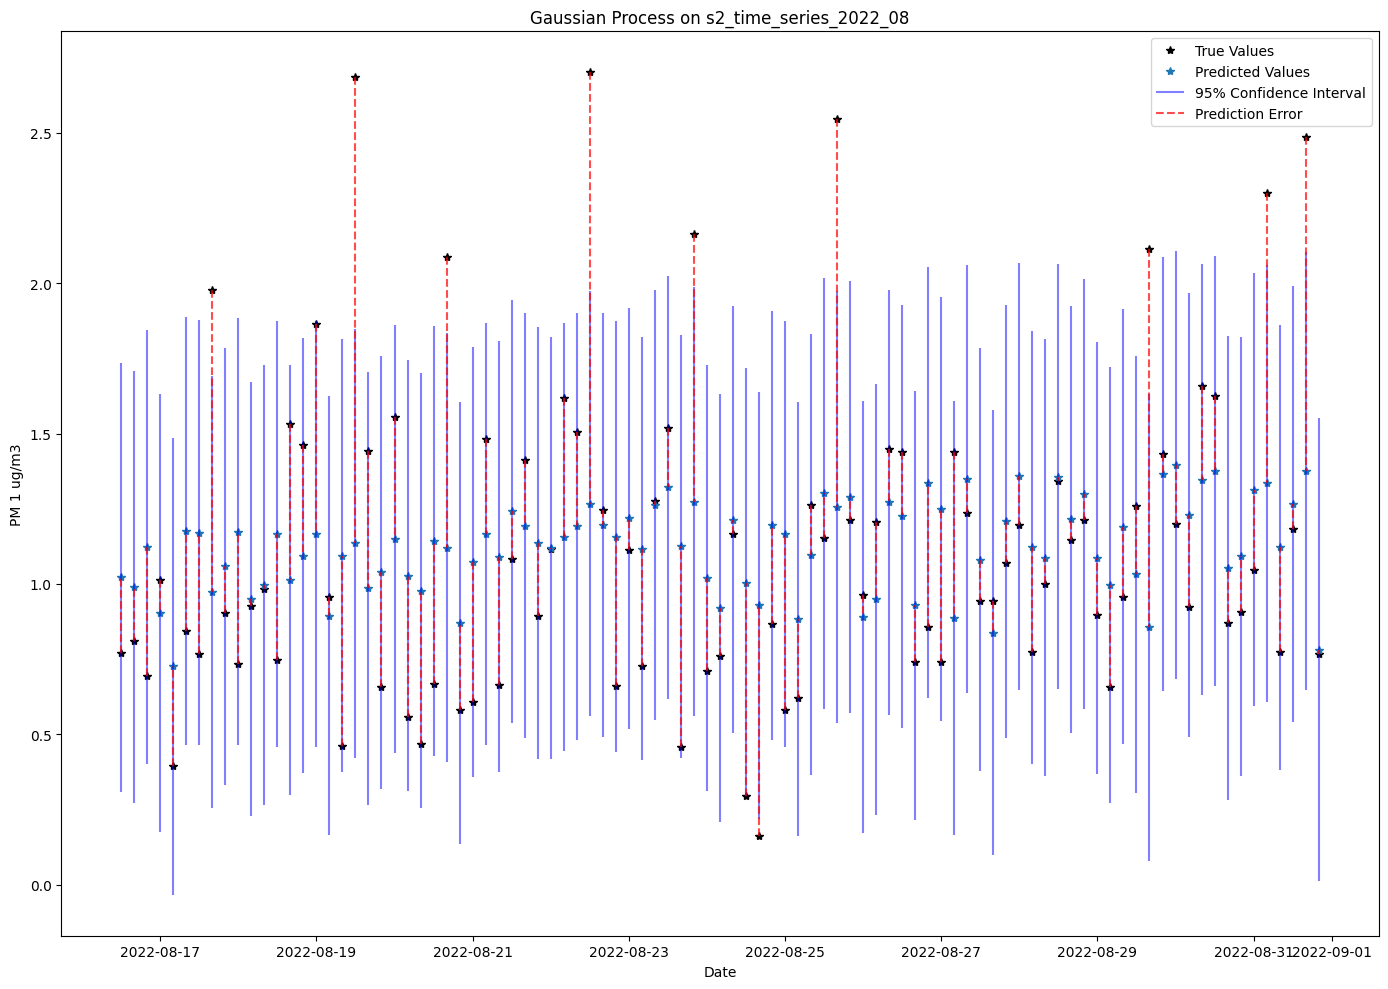

Iter 1/300 - Loss: 1.009 
Iter 11/300 - Loss: 0.879 
Iter 21/300 - Loss: 0.795 
Iter 31/300 - Loss: 0.768 
Iter 41/300 - Loss: 0.769 
Iter 51/300 - Loss: 0.767 
Iter 61/300 - Loss: 0.766 
Iter 71/300 - Loss: 0.766 
Iter 81/300 - Loss: 0.766 


KeyboardInterrupt: 

In [94]:
def log_normalize(data):
    epsilon = 1e-6
    data = np.maximum(data, 0)  # Ensure all values are non-negative
    return np.log1p(data + epsilon)

 # Define the month keys for s2 data
s2_keys = {
    's2_time_series_2022_06': s2_june22,
    's2_time_series_2022_07': s2_july22,
    's2_time_series_2022_08': s2_aug22,
    's2_time_series_2022_09': s2_sept22,
    's2_time_series_2022_10': s2_oct22,
    's2_time_series_2022_11': s2_nov22,
    's2_time_series_2022_12': s2_dec22,
    's2_time_series_2023_01': s2_jan23,
    's2_time_series_2023_02': s2_feb23,
    's2_time_series_2023_03': s2_mar23,
    's2_time_series_2023_04': s2_apr23,
    's2_time_series_2023_05': s2_may23,
    's2_time_series_2023_06': s2_june23,
}

# Loop through all months
for key, data in s2_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_s2_dict[key], f'Gaussian Process on {key}', 0)
    run_plt_gp(log_normalize(data), time_series_s2_dict[key],f'{key}', 1)
    print(" ")


In [ ]:
# Define the month keys for m1 data
m1_keys = {
    'm1_time_series_2022_06': m1_june22,
    'm1_time_series_2022_07': m1_july22,
    'm1_time_series_2022_08': m1_aug22,
    'm1_time_series_2022_09': m1_sept22,
    'm1_time_series_2022_10': m1_oct22,
    'm1_time_series_2022_11': m1_nov22,
    'm1_time_series_2022_12': m1_dec22,
    'm1_time_series_2023_01': m1_jan23,
    'm1_time_series_2023_02': m1_feb23,
    'm1_time_series_2023_03': m1_mar23,
    'm1_time_series_2023_04': m1_apr23,
    'm1_time_series_2023_05': m1_may23,
    'm1_time_series_2023_06': m1_june23,
}

# Loop through all months
for key, data in m1_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_m1_dict[key], f'Gaussian Process on {key}', 0)
    run_plt_gp(log_normalize(data), time_series_m1_dict[key],f'Gaussian Process on {key}', 1)
    print(" ")
